<a href="https://colab.research.google.com/github/RoadoneP/Machine_learning/blob/main/DecisionTree%2CRandomForest/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC(Decision_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#결정트리
- 분류와 회귀에 사용되는 지도 학습 방법
- 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
- if-then-else 결정 규칙을 통해 데이터 학습
- 트리의 깊이가 깊을 수록 복잡한 모델
- 결정 트리의 장점
 - 이해와 해석이 쉽다.
 - 시각화가 용이하다.
 - 많은 데이터 전처리가 필요하지 않다.
 - 수치형과 범주형 데이터를 모두 다룰 수 있다.

In [1]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn import tree
#분류,회귀를 위한 모듈
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

#분류를 위한 데이터

## 붓꽃 데이터
- 꽃받침(Sepal)과 꽃잎(Petal)의 길이와 폭을 가지고 세 개의 종을 분류

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns= iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 와인데이터

In [5]:
wine = load_wine()

In [6]:
wine_df = pd.DataFrame(data=wine.data,columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## 유방암 데이터 (과제로 해보기)

In [7]:
cancer = load_breast_cancer()

In [8]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 회귀를 위한 데이터

## 보스턴 주책 가격 데이터

In [9]:
boston = load_boston()

In [10]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 당뇨병 데이터

In [11]:
diabetes = load_diabetes() 

In [12]:
diabetes_df = pd.DataFrame(data=diabetes.data , columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


# 분류 - **`DecisionTreeClassifier()`**
  - `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
  - 두개의 배열 X,y를 입력받음
    - X는 [n_smaples,n_features]크기의 데이터 특성 배열
    - y는 [n_samples] 크기의 정답 배열


In [13]:
X= [[0, 0],[1, 1]]
y= [0, 1]

model = tree.DecisionTreeClassifier()
model = model.fit(X,y)

In [14]:
model.predict([[2., 2.]])

array([1])

In [15]:
#확률결과가 2를 넣었을때 1로 갔다는 것을 알 수 있음
model.predict_proba([[2., 2.]])

array([[0., 1.]])

 # 붓꽃 데이터 학습

## 교차 검증

### 전처리 없이 학습

In [16]:
model = DecisionTreeClassifier()

In [17]:
scores = cross_val_score(
    estimator = model,
    X= iris.data, y = iris.target,
    cv=5, #5번 교차검증 한다.
    n_jobs=multiprocessing.cpu_count()
)
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [18]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.95


## 전처리 후 학습
 - 결정 트리는 규칙을 학습하기 때문에 전처리(정규화)에 큰 영향을 받지 않는다.

In [20]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(),
)

**파이프라인의 목적**
- to assemble several steps that can be cross-validated together while setting different parameters
데이터변환(전처리)와 모델을 연결하여 코드를 줄이고 재사용성을 높이기위함

In [21]:
scores = cross_val_score(
    estimator = model,
    X = iris.data, y = iris.target,
    cv=5,
    n_jobs = multiprocessing.cpu_count()
)
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [22]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.96


### 학습된 결정 트리 시각화

In [23]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 텍스트를 통한 시각화

In [24]:
r = tree.export_text(decision_tree=model,
                     feature_names= iris.feature_names)
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



### plot_tree를 이용한 시각화

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

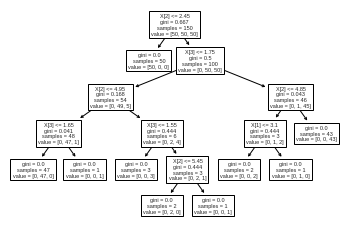

In [25]:
tree.plot_tree(model)

### graphviz를 이용한 시각화

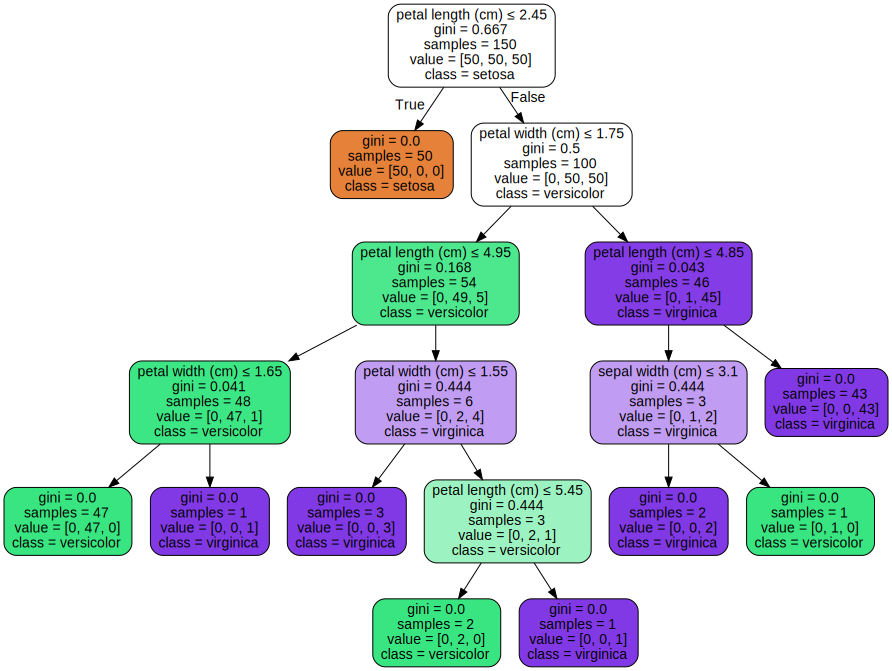

In [26]:
dot_data = tree.export_graphviz(decision_tree= model,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled= True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph

### 시각화

In [27]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

(0.0, 7.88, -0.9, 3.4800000000000044)

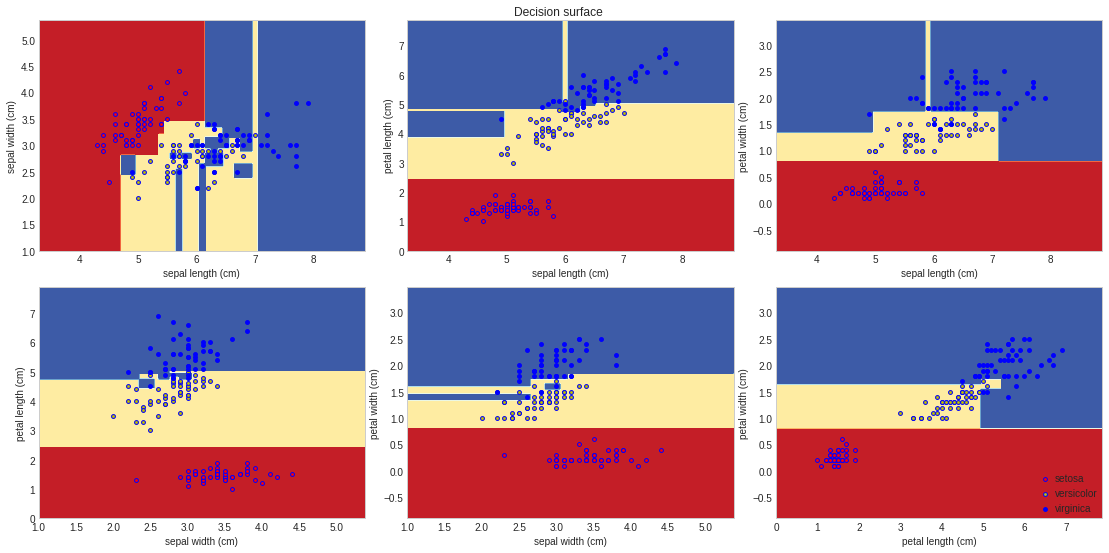

In [28]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
  X = iris.data[:,pair]
  y = iris.target
  
  model = DecisionTreeClassifier()
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx+1)

  x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
  y_min, y_max = X[:,1].min()-1,X[:,1].max()+1
  xx,yy = np.meshgrid(np.arange(x_min ,x_max ,plot_step),
                      np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad =2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes),plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx,0], X[idx,1], c= color, label= iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b',s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 하이퍼파라미터를 변경해 보면서 결정 경계의 변화 확인

(0.0, 7.88, -0.9, 3.4800000000000044)

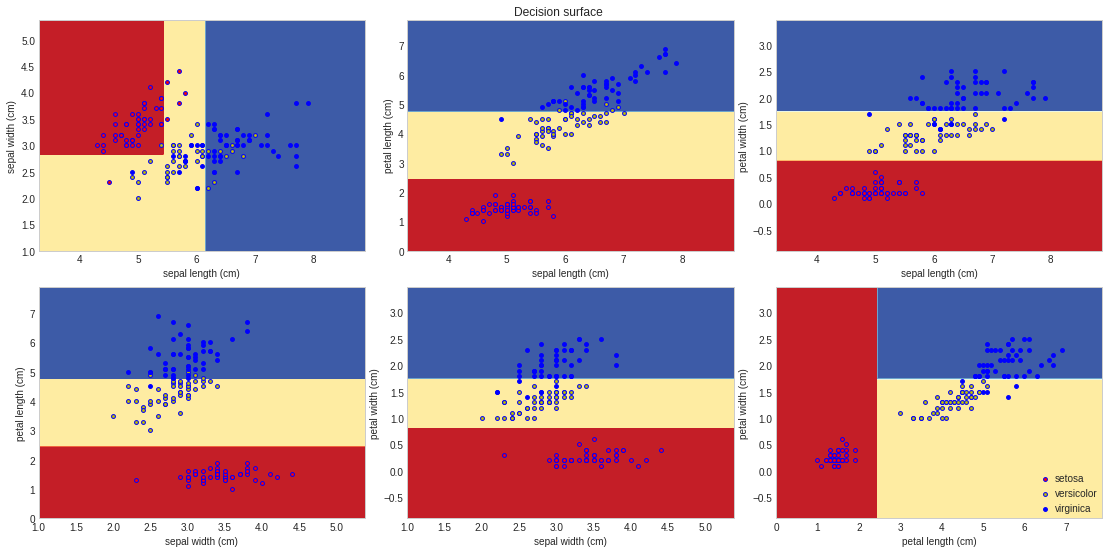

In [29]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
  X = iris.data[:,pair]
  y = iris.target
  
  model = DecisionTreeClassifier(max_depth=2)
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx+1)

  x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
  y_min, y_max = X[:,1].min()-1,X[:,1].max()+1
  xx,yy = np.meshgrid(np.arange(x_min ,x_max ,plot_step),
                      np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad =2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes),plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx,0], X[idx,1], c= color, label= iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b',s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

# 와인 데이터 학습

### 전처리 전 학습

In [30]:
model = DecisionTreeClassifier()

In [31]:
cross_val_score(
    estimator = model,
    X=wine.data,
    y=wine.target,
    cv=5,
    n_jobs = multiprocessing.cpu_count()
)

array([0.94444444, 0.83333333, 0.83333333, 0.91428571, 0.85714286])

### 전처리 후 학습

In [34]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [35]:
cross_val_score(
    estimator = model,
    X=wine.data,
    y=wine.target,
    cv=5,
    n_jobs = multiprocessing.cpu_count()
)

array([0.94444444, 0.83333333, 0.91666667, 0.91428571, 0.82857143])

### 트리 시각화

In [36]:
model = DecisionTreeClassifier()
model.fit(wine.data,wine.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 텍스트를 이용한 시각화

In [40]:
r = tree.export_text(decision_tree= model,
                     feature_names= wine.feature_names,
                     )
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- color_intensity <= 5.82
|   |   |   |   |--- class: 1
|   |   |   |--- color_intensity >  5.82
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- magnesium <= 98.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- magnesium >  98.50
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- color_intensity <= 3.61
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.61
|   |   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- magnesi

### graphviz를 이용한 시각화

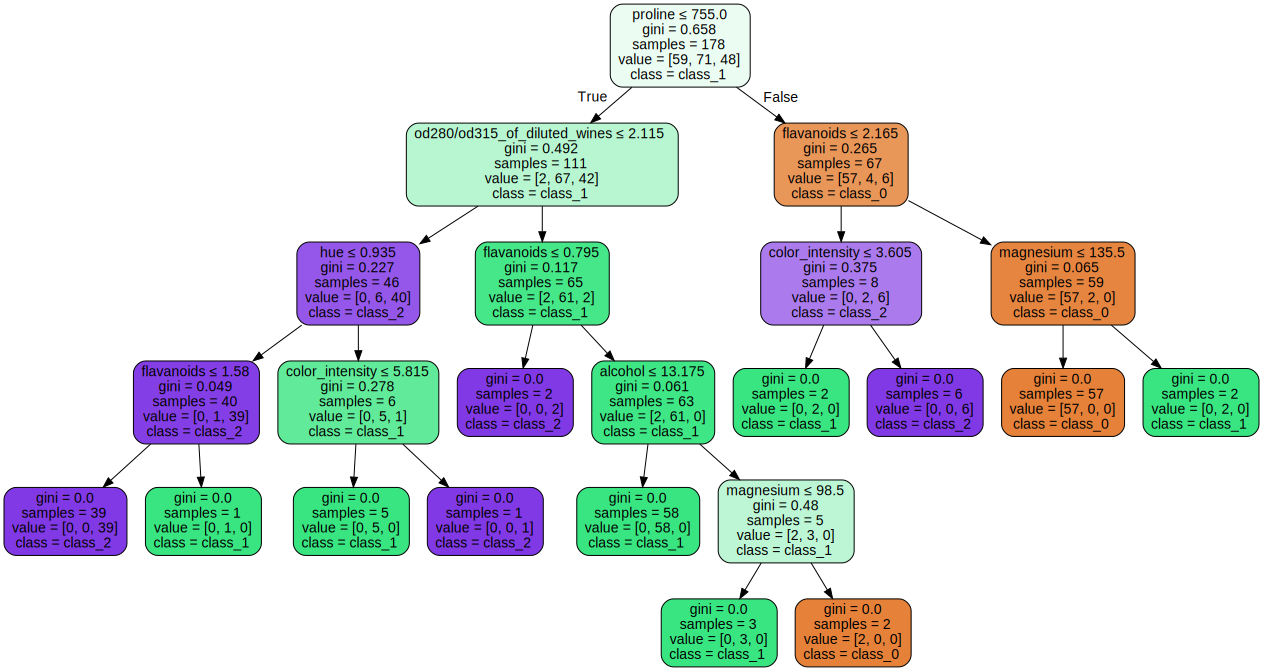

In [42]:
dot_data = tree.export_graphviz(decision_tree= model,
                                feature_names = wine.feature_names,
                                class_names = wine.target_names,
                                filled= True, rounded = True,
                                special_characters = True)
graph = graphviz.Source(dot_data)
graph

### 결정 경계 시각화

In [44]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

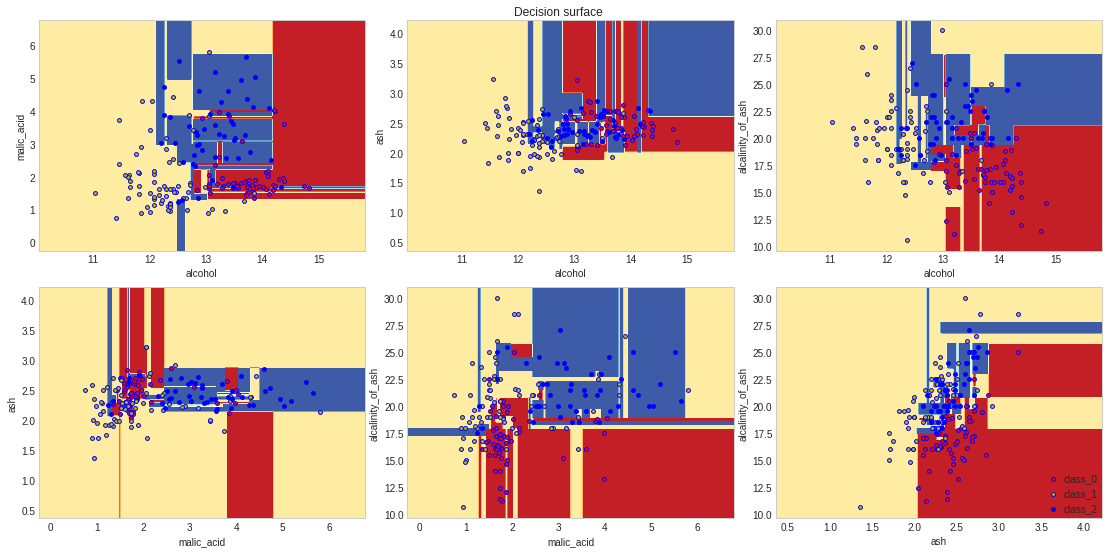

In [47]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
  X = wine.data[:,pair]
  y = wine.target
  
  model = DecisionTreeClassifier()
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx+1)

  x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
  y_min, y_max = X[:,1].min()-1,X[:,1].max()+1
  xx,yy = np.meshgrid(np.arange(x_min ,x_max ,plot_step),
                      np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad =2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes),plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx,0], X[idx,1], c= color, label= wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b',s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 하이퍼 텍스트 변화

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

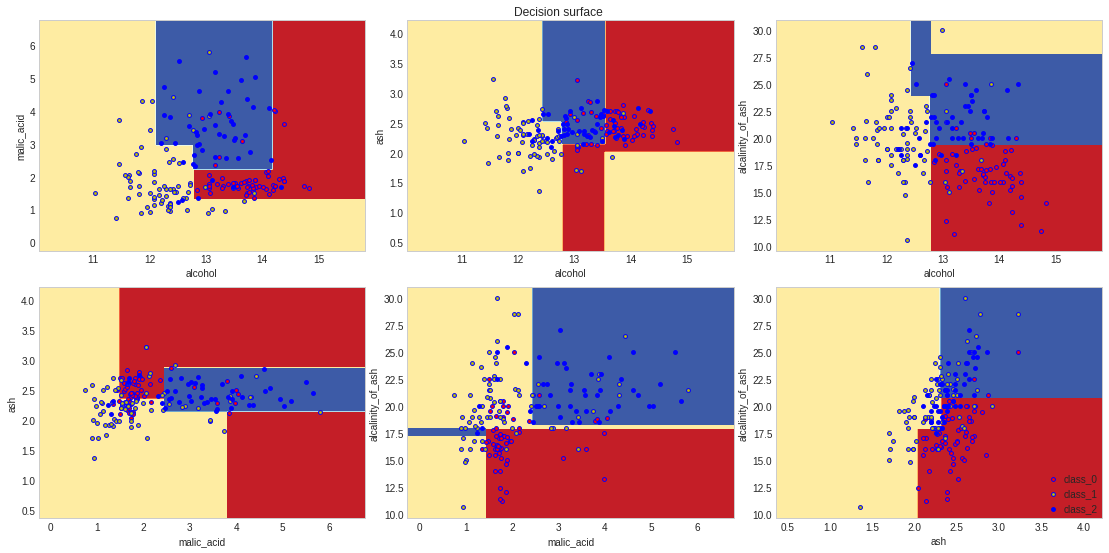

In [48]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
  X = wine.data[:,pair]
  y = wine.target
  
  model = DecisionTreeClassifier(max_depth=3)
  model = model.fit(X,y)

  plt.subplot(2, 3, pairidx+1)

  x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
  y_min, y_max = X[:,1].min()-1,X[:,1].max()+1
  xx,yy = np.meshgrid(np.arange(x_min ,x_max ,plot_step),
                      np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad =2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes),plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx,0], X[idx,1], c= color, label= wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b',s=15)
    
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

# 회귀 - **`DecisionTreeRegressor()`**

#보스턴 주택 가격 데이터 학습

## 교차검증

### 전처리 없이 학습

In [49]:
model = DecisionTreeRegressor()

In [51]:
cross_val_score(
    estimator = model,
    X=boston.data,
    y=boston.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([ 0.63515197,  0.42955908,  0.60263611,  0.39245033, -1.19960006])

### 전처리 후 학습

In [52]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

In [53]:
cross_val_score(
    estimator = model,
    X=boston.data,
    y=boston.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([ 0.62873907,  0.42723274,  0.61224692,  0.36148033, -1.84302642])

## 학습된 결정 트리 시각화

In [54]:
model = DecisionTreeRegressor()
model.fit(boston.data, boston.target)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### 텍스트를 이용한 시각화

In [55]:
print(tree.export_text(model))

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_12 <= 10.83
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_12 >  10.83
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_12 <= 7.57
|   |   |   |   |   |--- feature_9 <= 222.50
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- feature_9 >  222.50
|   |   |   |   |   |   |--- feature_2 <= 5.48
|   |   |   |   |   |   |   |--- feature_10 <= 19.95
|   |   |   |   |   |   |   |   |--- feature_11 <= 393.33
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 26.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  26.05
|   |   |   |   |   |   |   |   |   |   |   |--- value: [21.90]
|   |   |   |   |   |   |   |   |   |--- feat

### 회귀식 시각화

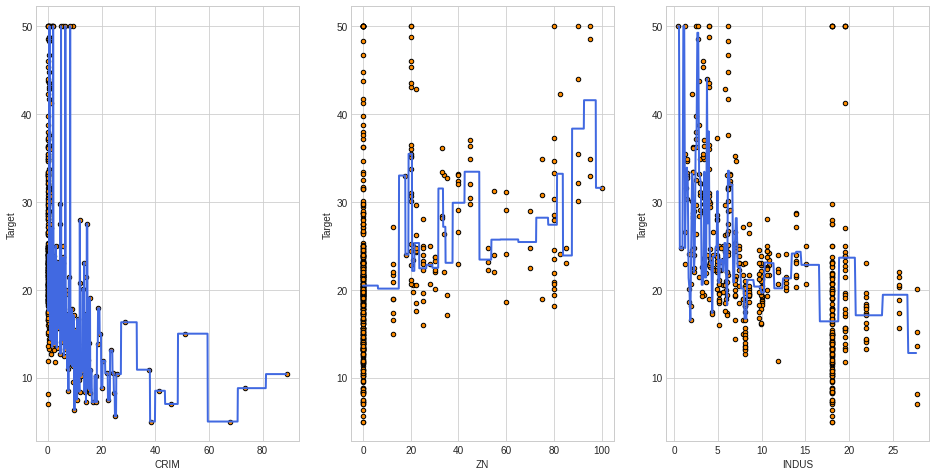

In [60]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0,1,2]):
  X = boston.data[:,pair].reshape(-1,1)
  y = boston.target
  
  model = DecisionTreeRegressor()
  model.fit(X,y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(X, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  plt.plot(X_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')

### 하이퍼파라미터의 변경

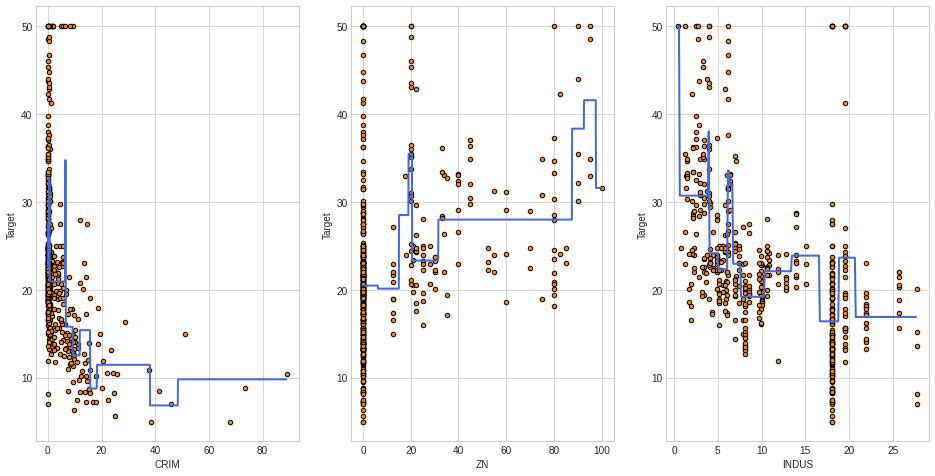

In [61]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([0,1,2]):
  X = boston.data[:,pair].reshape(-1,1)
  y = boston.target
  
  model = DecisionTreeRegressor(max_depth=4)
  model.fit(X,y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(X, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  plt.plot(X_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')